## Ranked_Choice_Voting_and_Voting_Methods
from the [AMS feature column](http://www.ams.org/publicoutreach/feature-column/fcarc-voting-decision)

18 ballots: A, D, E, C, B  
12 ballots: B, E, D, C, A  
10 ballots: C, B, E, D, A  
9 ballots: D, C, E, B, A  
4 ballots: E, B, D, C, A  
2 ballots: E, C, D, B, A  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Create the ballots

election_data = []


for a in range(18):
    election_data.append({'A':1, 'B':5, 'C':4, 'D':2, 'E':3})
for b in range(12):
    election_data.append({'A':5, 'B':1, 'C':4, 'D':3, 'E':2})
for c in range(10):
    election_data.append({'A':5, 'B':2, 'C':1, 'D':4, 'E':3})
for d in range(9):
    election_data.append({'A':5, 'B':4, 'C':2, 'D':1, 'E':3})
for e in range(4):
    election_data.append({'A':5, 'B':2, 'C':4, 'D':3, 'E':1})
for f in range(2):
    election_data.append({'A':5, 'B':4, 'C':2, 'D':3, 'E':1})
    
election_df = pd.DataFrame(election_data)

In [3]:
pd.DataFrame(np.unique(election_df, axis=0), columns = ['A', 'B', 'C', 'D', 'E'])

,A,B,C,D,E
0,1,5,4,2,3
1,5,1,4,3,2
2,5,2,1,4,3
3,5,2,4,3,1
4,5,4,2,1,3
5,5,4,2,3,1


In [4]:
candidates = ['A', 'B', 'C', 'D', 'E']
candidate_colors = ['green', 'blue', 'purple', 'red', 'orange']

In [5]:
# First Past the Post
# Creating a function for counting instances of first place

def voting_round(election_round_df, candidates, n):
    round_data = {}

    for candidate in candidates:
        firsts = election_df[election_df[candidate]==1][candidate].count()
        round_data.update({candidate:firsts})

    round_df = pd.DataFrame(round_data, index=['Round_'+str(n)], columns=candidates)
    return round_df

In [6]:
round_1_results= voting_round(election_df, candidates, 1)
round_1_results

,A,B,C,D,E
Round_1,18,12,10,9,6


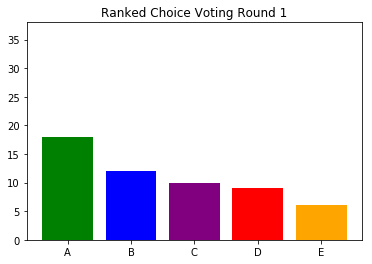

In [69]:
plt.bar(x=candidates, height=round_1_results.iloc[0], color=candidate_colors)
plt.ylim(top=38)
plt.title('Ranked Choice Voting Round 1')
plt.show()

(array([18.,  0.,  0.,  0., 37.]),
 array([1, 2, 3, 4, 5, 6]),
 <a list of 5 Patch objects>)

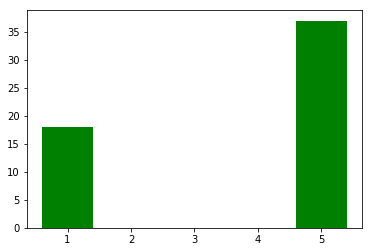

In [12]:
plt.hist(election_df['A'], bins=range(1,7), align='left', rwidth=0.8, color='green', label='A')

Text(0.5, 1.0, 'Candidate A Ranks')

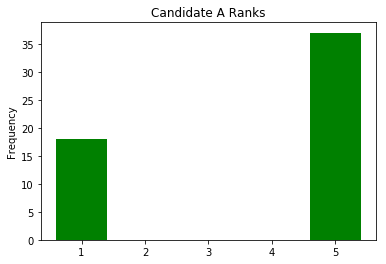

In [66]:
election_df['A'].plot.hist(bins=range(1,7), align='left', rwidth=0.8, 
                           color=candidate_colors).set_title('Candidate A Ranks')

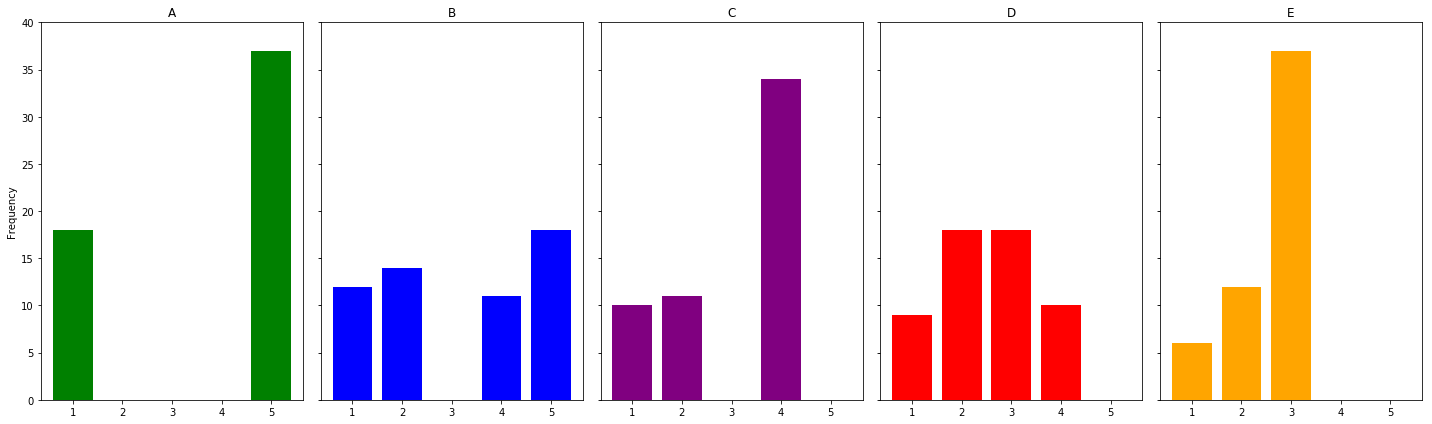

In [17]:
plt.figure(figsize=(20,6))
for index, candidate in enumerate(candidates):
    # Get the unique subplot 
    ax = plt.subplot(1, 5, index+1)
    election_df[candidate].plot.hist(bins=range(1,7), align='left', rwidth=0.8, color=candidate_colors[index],
                                     ax=ax, legend=False, sharey=True)
    # Set the title and max height of each plot
    ax.set_title(candidate)
    ax.set_ylim([0,40])
plt.tight_layout()

In [ ]:
# Two-Round Runoff

In [45]:
top_two_elim = round_1_results.iloc[0].nsmallest(3).index

In [46]:
for candidate in top_two_elim:
    print(candidate)

E
D
C


In [48]:
top_two_finals = round_1_results.iloc[0].nlargest(2).index
for candidate in top_two_finals:
    print(candidate)

A
B


In [49]:
# Single runoff election function

# def runoff(election_round_df, candidates, round_data, n):
top_two_elim = ['E', 'D', 'C']
top_two_finals = ['A', 'B']

election_df[election_df['E']==1]
    

,A,B,C,D,E
49,5,2,4,3,1
50,5,2,4,3,1
51,5,2,4,3,1
52,5,2,4,3,1
53,5,4,2,3,1
54,5,4,2,3,1


In [56]:
round_1_results.append(pd.DataFrame({'A':18, 'B':37, 'C':0, 'D':0, 'E':0}, index=['Round_2']))

,A,B,C,D,E
Round_1,18,12,10,9,6
Round_2,18,37,0,0,0


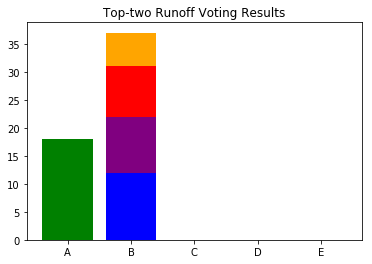

In [58]:
round2 = np.array([18, 12, 0, 0, 0])
round2plus_c = np.array([0, 10, 0, 0, 0])
round2plus_d = np.array([0, 9, 0, 0, 0])
round2plus_e = np.array([0, 6, 0, 0, 0])

plt.bar(candidates, round2, color=candidate_colors)
plt.bar(candidates, round2plus_c, color='Purple', bottom=round2)
plt.bar(candidates, round2plus_d, color='Red', bottom=round2+round2plus_c)
plt.bar(candidates, round2plus_e, color='Orange', bottom=round2+round2plus_c+round2plus_d)
# plt.ylim(top=)
plt.title("Top-two Runoff Voting Results")
plt.show()

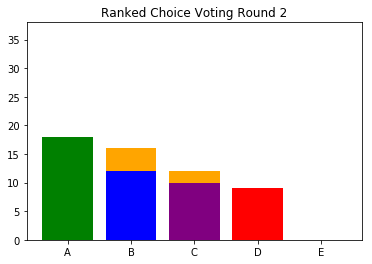

In [70]:
round2 = np.array([18, 12, 10, 9, 0])
round2plus_e = np.array([0, 4, 2, 0, 0])

plt.bar(candidates, round2, color=candidate_colors)
plt.bar(candidates, round2plus_e, color='Orange', bottom=round2)
plt.ylim(top=38)
plt.title("Ranked Choice Voting Round 2")
plt.show()

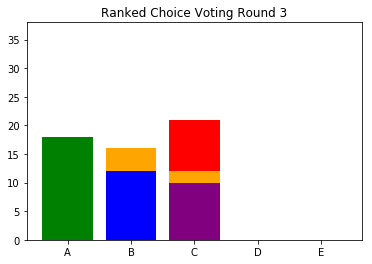

In [71]:
round3 = np.array([18, 12, 10, 0, 0])
round3plus_e = np.array([0, 4, 2, 0, 0])
round3plus_d = np.array([0, 0, 9, 0, 0])

plt.bar(candidates, round3, color=candidate_colors)
plt.bar(candidates, round3plus_e, color='Orange', bottom=round3)
plt.bar(candidates, round3plus_d, color='Red', bottom=round3+round3plus_e)
plt.ylim(top=38)
plt.title("Ranked Choice Voting Round 3")
plt.show()

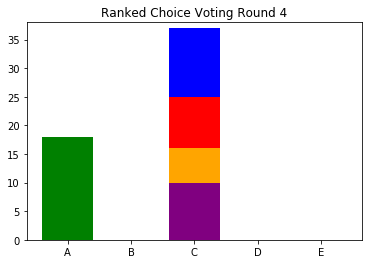

In [72]:
round4 = np.array([18, 0, 10, 0, 0])
round4plus_e = np.array([0, 0, 6, 0, 0])
round4plus_d = np.array([0, 0, 9, 0, 0])
round4plus_b = np.array([0, 0, 12, 0, 0])

plt.bar(candidates, round4, color=candidate_colors)
plt.bar(candidates, round4plus_e, color='Orange', bottom=round4)
plt.bar(candidates, round4plus_d, color='Red', bottom=round4+round4plus_e)
plt.bar(candidates, round4plus_b, color='Blue', bottom=round4+round4plus_e+round4plus_d)
plt.ylim(top=38)
plt.title("Ranked Choice Voting Round 4")
plt.show()

In [7]:
# Borda Count

borda_results = election_df.apply(lambda x: 5-x).sum(axis=0)

In [19]:
pd.DataFrame(borda_results, columns=['Borda Count']).transpose()

,A,B,C,D,E
Borda Count,72,101,107,136,134


Text(0.5, 1.0, 'Borda Count Results')

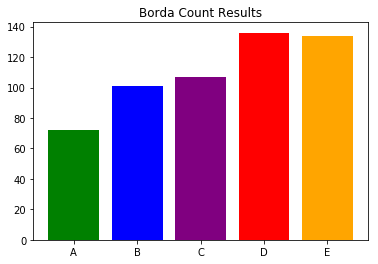

In [10]:
plt.bar(candidates, borda_results, color=candidate_colors)
plt.title('Borda Count Results')